In [ ]:
#importing the dataset 
import pandas as pd

In [ ]:
#loading the dataset into the pandas dataframe
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)


--2022-10-26 07:41:24--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2022-10-26 07:41:24 (65.7 MB/s) - ‘titanic.csv’ saved [61194/61194]

--2022-10-26 07:41:24--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
#checking the dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#output the shape...to show how many rows and columns we have
print(dataset.shape)

(891, 12)


In [ ]:
#calculate the number of empty cells in a column
#the following line consists of three commands
missing_data=dataset.isnull().sum().to_frame()
#rename column holding sums
missing_data=missing_data.rename(columns={0:'Empty Cells'})

print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


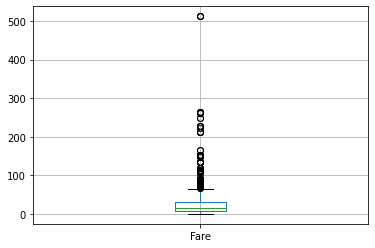

In [ ]:
#checking for outliers in  column fare
dataset.boxplot(column=['Fare'])

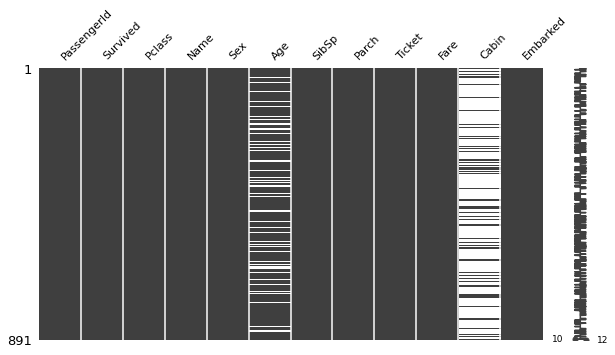

In [ ]:
#importing the missing number 
import missingno as msno
#plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(10,5), fontsize=11)

In [ ]:
#identifying individuals with missing information
#select passengers with unknown age. notice how we use .isnull()rows with no value
unknown_age=dataset[dataset["Age"].isnull()]
#print only the columns we want for the moment
#limit output to 20 rows
unknown_age[["PassengerId","Name","Survived","Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [ ]:
#find the missing age and cabin information
missing_age=dataset["Age"].isnull()
missing_cabin=dataset["Cabin"].isnull()
#find those missing in both
unknown_age_and_cabin=dataset[missing_age&missing_cabin]
print("Number of passengers with missing age and cabin info:", len(unknown_age_and_cabin))

Number of passengers with missing age and cabin info: 158


In [ ]:
import graphing
graphing.histogram(dataset, 'Pclass',title='Ticket Class(All Passengers)',show=True)


In [ ]:
graphing.histogram(unknown_age_and_cabin, 'Pclass',title='Ticket All Passengers missing cabin and age')

In [ ]:
import numpy as np
#print the average age of passengers we have age data for
mean_age=np.mean(dataset.Age)
print("Average age on the ship was",mean_age,"years old")

#Now make another model where missing age contained a 0
dataset['Age_2']=dataset['Age'].fillna(0)
mean_age=np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")


Average age on the ship was 29.69911764705882 years old
The average age on the ship was 23.79929292929293 years old


In [ ]:
graphing.histogram(dataset, label_x="Age_2")

In [ ]:
# Create a "clean" dataset where we cumulatively fix missing values
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)

The original size of our dataset was (891, 13)
The shape for the clean dataset is (889, 13)


In [ ]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


In [ ]:
#starting with machine models
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#visual ordinal data
import graphing
graphing.histogram(dataset, label_x='Pclass', label_y='Survived', histfunc='avg',)

In [ ]:
#visual continuing data
graphing.scatter_2D(dataset, label_x="Age", label_y="Fare")

In [ ]:
# Plot Fare vs Survival
graphing.histogram(dataset, label_x="Fare", label_y="Survived", histfunc="avg", nbins=30, title="Fare vs Survival", include_boxplot=True, show=True)

# Plot Age vs Survival
graphing.histogram(dataset, label_x="Age", label_y="Survived", histfunc="avg", title="Age vs Survival", nbins=30, include_boxplot=True)

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create some simple functions
# Read their descriptions to find out more 
def get_rows(sex, port):
    '''Returns rows that match in terms of sex and embarkment port'''
    return dataset[(dataset.Embarked == port) & (dataset.Sex == sex)]

def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["C", "Q", "S" ] * 2

# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# Calculate the proportion of passengers from each port + sex combination who survived
passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# Combine into a single data frame
table = pd.DataFrame(dict(
    sex=sexes,
    port=ports,
    passenger_count=passenger_count,
    passenger_survival_rate=passenger_survival
))

# Make a bubble plot
# This is just a scatter plot but each entry in the plot 
# has a size and colour. We set colour to passenger_survival 
# and size to the number of passengers 
graphing.scatter_2D(table, 
                    label_colour="passenger_survival_rate", 
                    label_size="passenger_count", 
                    size_multiplier=0.3,
                    title="Bubble Plot of Categorical Data")

In [ ]:
# Swap male / female with numerical values
# We can do this because there are only two categories
dataset["IsFemale"] = dataset.Sex.replace({'male':0, 'female':1})

# Print out the first few rows of the dataset
print(dataset.head())

# Run and test the model, also using IsFemale this time
features = ["Age", "Pclass", "SibSp", "Parch", "Fare", "IsFemale"] 
loss_binary_categoricals = train_logistic_regression(dataset, features)

print(f"\nNumerical + Sex, Log-Loss (cost): {loss_binary_categoricals}")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  IsFemale  
0      0         A/5 21171   7.2500   NaN        S         0  
1      0          PC 17599  71.2833   C85        C         1  
2      0  STON/O2. 3101282   7.9250   NaN        S         1  
3      0            113803  53.1000  C123        S         1  
4    

NameError: ignored